<a href="https://colab.research.google.com/github/vaishak-krishnan/LeNet_MNIST/blob/main/LeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape:', X_train.shape, 'X_test shape:', X_test.shape)


X_train shape: (60000, 28, 28) X_test shape: (10000, 28, 28)


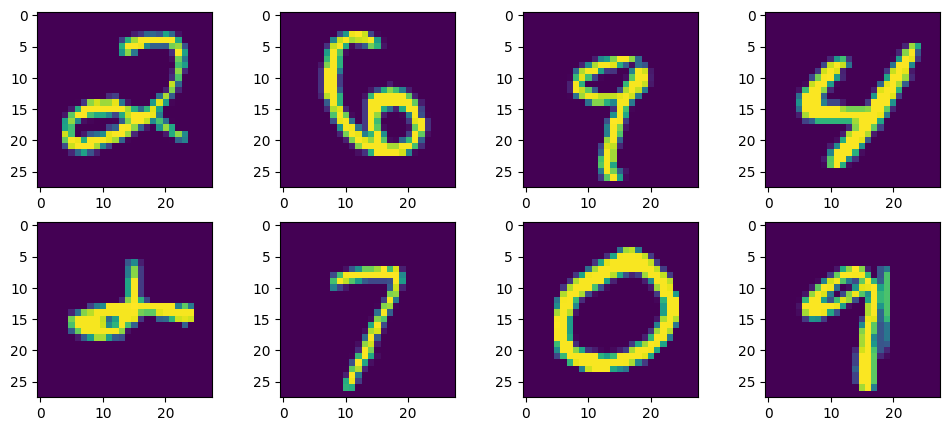

In [9]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

In [10]:
from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0

  # One-hot encoding label
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

def LeNet():
    model = Sequential()

    # Convolutional layer
    model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='same',
                     activation='relu', input_shape=(28, 28, 1)))

    # Max-pooling layer with pooling window size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional layer
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten())

    # The first fully connected layer
    model.add(Dense(120, activation='relu'))

    # The output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model with a loss function, a metric, and an optimizer function
    # In this case, the loss function is categorical crossentropy
    # We use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01
    # to optimize the loss function
    # Metric: accuracy

    opt = SGD(learning_rate=0.01)
    model.compile(loss=categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])

    return model

LeNet_model = LeNet()
LeNet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize the pixel values to be between 0 and 1
X_train /= 255
X_test /= 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the train_model function
def train_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=128):
    # Set up early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping])

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test loss: {test_loss:.4f}')
    print(f'Test accuracy: {test_accuracy:.4f}')

# Train the model
LeNet_model = LeNet()
train_model(LeNet_model, X_train, y_train, X_test, y_test)


Epoch 1/10
469/469 [==============================] - 34s 72ms/step - loss: 1.2362 - accuracy: 0.6362 - val_loss: 0.3338 - val_accuracy: 0.9041
Epoch 2/10
469/469 [==============================] - 36s 76ms/step - loss: 0.2804 - accuracy: 0.9172 - val_loss: 0.2122 - val_accuracy: 0.9391
Epoch 3/10
469/469 [==============================] - 32s 69ms/step - loss: 0.1995 - accuracy: 0.9402 - val_loss: 0.1583 - val_accuracy: 0.9540
Epoch 4/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1581 - accuracy: 0.9535 - val_loss: 0.1405 - val_accuracy: 0.9573
Epoch 5/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1330 - accuracy: 0.9604 - val_loss: 0.1219 - val_accuracy: 0.9643
Epoch 6/10
469/469 [==============================] - 33s 71ms/step - loss: 0.1164 - accuracy: 0.9646 - val_loss: 0.1064 - val_accuracy: 0.9675
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.1037 - accuracy: 0.9688 - val_loss: 0.0954 - val_accuracy: